In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters
import lmfit
import pandas as pd


In [2]:
df0 = pd.read_csv('curve_data.txt', sep = '\t')
df0

,x,y,dy
0,0.0000,1.5826,0.3
1,1.2857,6.9361,0.3
2,2.5714,4.8991,0.3
3,3.8571,-1.5914,0.3
4,5.1429,-2.5532,0.3
5,6.4286,2.8287,0.3
6,7.7143,7.1324,0.3
7,9.0000,4.1764,0.3


In [3]:
x = df0['x']
y = df0['y']
dy = df0['dy']


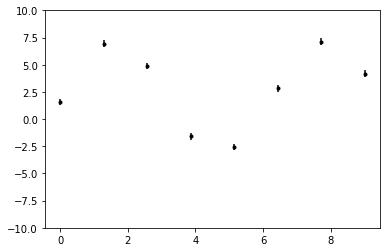

In [4]:
plt.figure()
plt.errorbar(x, y, yerr = dy, fmt = 'k.')
plt.ylim([-10, 10])
plt.show()


In [5]:
def poly(x, **params):
    """
    Polynomial fitting function that takes in a parameter dictionatry which are the polynomial coefficients
    :param x: independent variable
    :param params: keywork argument - dictionary of the form ({'c00': c0, 'c01': c1, etc})
    :return: polynomial function of arbitrary order
    """
    temp= 0.0
    parnames = sorted(params.keys())
    for i, pname in enumerate(parnames):
        temp += params[pname]*x**i
    return temp

c = np.ones(len(x)-3)
# Polynomial fit using poly function
polyModel = Model(poly)

# Parameter names and starting values
polyParams = Parameters()
for j in range(len(c)):
    polyParams.add('C{0:g}'.format(j), value=c[j])
polyResult = polyModel.fit(y, polyParams, x=x)

# polyResult.plot()
# plt.show()


# plt.figure()
# plt.errorbar(x, y, yerr = dy, fmt = 'k.')
# plt.plot(x, polyResult.best_fit)
# plt.show()


print(polyResult.chisqr)
print(polyResult.redchi)

3.113932585466558
1.0379775284888526


In [6]:
def sineFit(x, A, C):
    return(C + A*np.sin(x))

sineModel = lmfit.models.ExpressionModel("C + A*sin(x)")
params = sineModel.make_params(C=1, A=1)

sineResult = sineModel.fit(y, params, x=x)
# sineResult.plot()
# plt.show()

print(sineResult.chisqr)
print(sineResult.redchi)

0.2437957554412642
0.040632625906877363


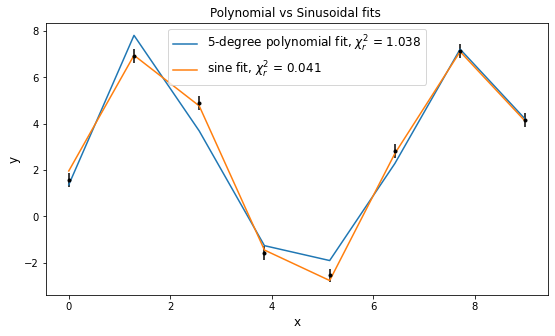

In [7]:
plt.figure(figsize = (9, 5))
plt.errorbar(x, y, yerr = dy, fmt = 'k.')
plt.plot(x, polyResult.best_fit, label = f'{len(c)}-degree polynomial fit, $\chi^2_r$ = {polyResult.redchi:.3f}')
plt.plot(x, sineResult.best_fit, label = f'sine fit, $\chi^2_r$ = {sineResult.redchi:.3f}')
plt.legend(loc = 'best', fontsize = 12)
plt.title('Polynomial vs Sinusoidal fits ')
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.show()

In [8]:
day = np.arange(1, 6, 1) # length five because non-inclusive
dja = np.array([2470, 2510, 2410, 2350, 2240])


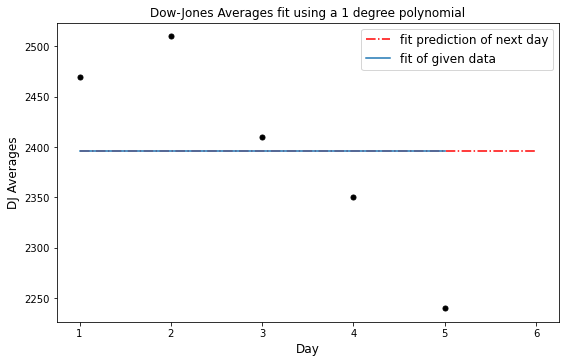

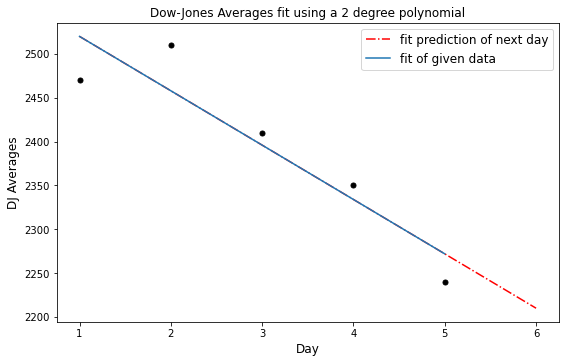

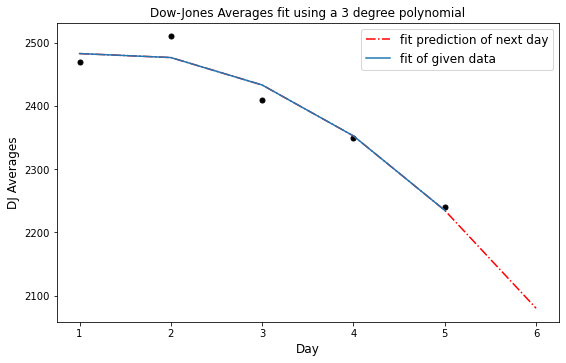

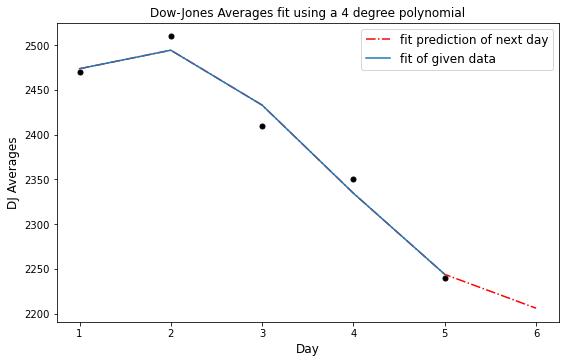

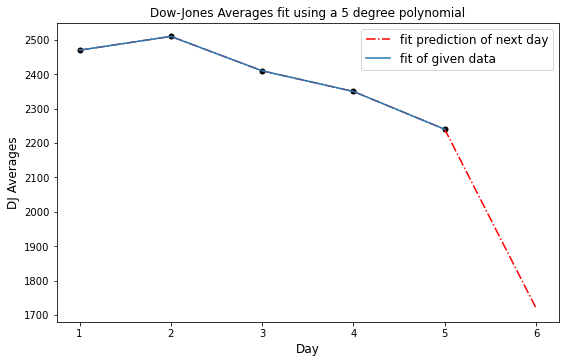

In [110]:


for deg in np.arange(1, 6, 1): # fit up to a quartic
    c2 = np.ones(deg)

    # Polynomial fit using poly function
    dowModel = Model(poly)

    # Parameter names and starting values
    dowParams = Parameters()
    for j in range(len(c2)):
        dowParams.add('C{0:g}'.format(j), value=c2[j])
    dowResult = dowModel.fit(dja, dowParams, x=day)

    afterDays = np.arange(1, 7, 1)
    extrap = dowResult.eval(x = afterDays)

    # plt.figure()
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (9, 5.5))

    axs.set_title(f'Dow-Jones Averages fit using a {deg}-degree polynomial', fontsize = 12)
    axs.plot(day, dja, 'k.', markersize = 10)
    axs.plot(afterDays, extrap, 'r-.', label = f'fit prediction of next day')
    axs.plot(day, dowResult.best_fit, label = f'fit of given data')
    axs.legend(fontsize = 12)
    axs.set_xlabel('Day', fontsize = 12)
    axs.set_ylabel('DJ Averages', fontsize = 12)

    plt.show()

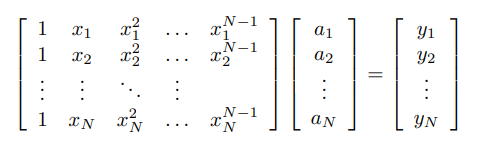

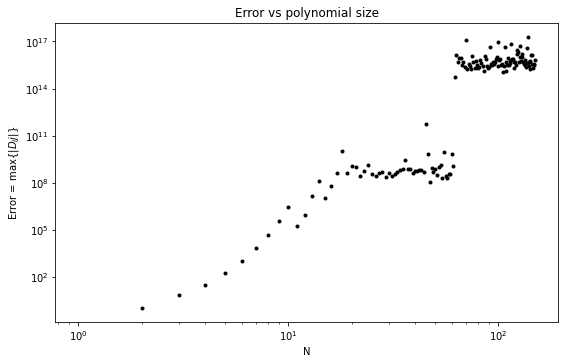

In [90]:

def problem5(N):

    # construct vandermonde matrix 
    
    # evenly spaced data
    x = np.arange(1, N + 1)
    
    vander = np.array([[xi**i for i in range(N)] for xi in x])
#     print(f'vandermonde matrix: \t\t{vander}\n')
    
    # take the inverse of the vandermonde matrix
    vanderInv = np.linalg.inv(vander)
    
    # Identity matrix the size of the vandermonde matrix
    I = np.eye(len(vander))
    D = vander*vanderInv - I
    
    err = np.max(abs(D))
    
    return(err)

nvals = np.arange(1, 150, 1)

evals = [problem5(n) for n in nvals]

plt.figure(figsize = (9, 5.5))
plt.loglog(nvals, evals, 'k.')
plt.title('Error vs polynomial size')
plt.ylabel('Error = max{|$D_ij$|}')
plt.xlabel('N')
plt.show()